In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

In [2]:
file_path = 'analysis1_sample_data.csv'
df = pd.read_csv(file_path)

In [3]:
df.head()

,user_id,first_purchase_date,second_purchase_date,second_purchase_type,second_purchase_item_quantity,second_purchase_price,third_purchase_date,third_purchase_type,third_purchase_item_quantity,third_purchase_price,...,tenth_purchase_price,eleventh_purchase_date,eleventh_purchase_type,eleventh_purchase_item_quantity,eleventh_purchase_price,twelfth_purchase_date,twelfth_purchase_type,twelfth_purchase_item_quantity,twelfth_purchase_price,ltv_365
0,1,2023-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2,2023-02-25,2023-03-10,定期,3.0,3600.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3600.0
2,3,2023-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,4,2023-02-15,2023-02-26,定期,3.0,3600.0,2023-03-31,定期,3.0,4050.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13050.0
4,5,2023-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [4]:
df["first_purchase_date"] = pd.to_datetime(df["first_purchase_date"])
df["second_purchase_date"] = pd.to_datetime(df["second_purchase_date"])

In [5]:
#F1〜F2の日数を追加
df["datediff_f1_to_f2"] = (df["second_purchase_date"] - df["first_purchase_date"]).dt.days

In [6]:
#F1〜F2の日数ごとのユーザー数をカウント
count_f2_users = df.groupby("datediff_f1_to_f2")["user_id"].nunique()

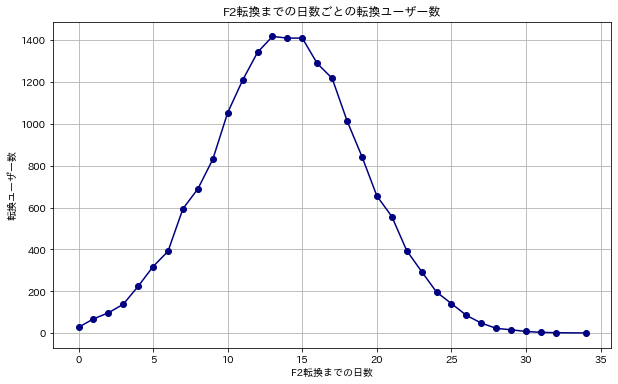

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(count_f2_users.index, count_f2_users.values, marker='o', linestyle='-', color='navy')
plt.title('F2転換までの日数ごとの転換ユーザー数')
plt.xlabel('F2転換までの日数')
plt.ylabel('転換ユーザー数')
plt.grid(True)
plt.show()

In [8]:
#F2~F5の定期・スポットの分類ごとにユーザー数をカウント
purchase_types = ['second_purchase_type', 'third_purchase_type', 'fourth_purchase_type', 'fifth_purchase_type']
results = {purchase: df.groupby(purchase)["user_id"].nunique() for purchase in purchase_types}
results_df = pd.DataFrame(results).fillna(0).transpose()

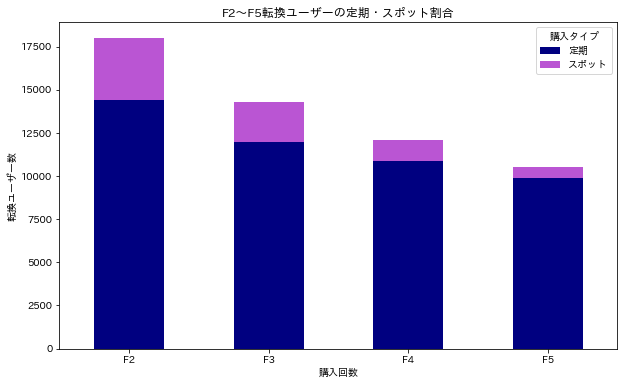

In [9]:
results_df_reversed = results_df[results_df.columns[::-1]]

colors = ['navy', 'mediumorchid']

results_df_reversed.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
ticks = range(len(results_df.index))
labels = ['F2', 'F3', 'F4', 'F5']
plt.title('F2〜F5転換ユーザーの定期・スポット割合')
plt.xlabel('購入回数')
plt.ylabel('転換ユーザー数')
plt.xticks(ticks=ticks, labels=labels, rotation=0)

plt.legend(title='購入タイプ')
plt.show()

In [10]:
#F2の定期・スポットの分類ごとに365日LTVの平均を集計
agg_mean_results = df.groupby('second_purchase_type').agg(
    avg_ltv=pd.NamedAgg(column='ltv_365', aggfunc='mean')
).reset_index()

In [11]:
agg_mean_results = agg_mean_results.rename(columns={
    'second_purchase_type': 'F2転換タイプ',
    'avg_ltv': '365日LTV平均'
})

In [12]:
agg_mean_results['365日LTV平均'] = agg_mean_results['365日LTV平均'].round()
agg_mean_results['365日LTV平均'] = agg_mean_results['365日LTV平均'].astype('int')

In [13]:
agg_mean_results

,F2転換タイプ,365日LTV平均
0,スポット,6428
1,定期,17809


In [14]:
df_filtered = df[df['ltv_365'] > 0]

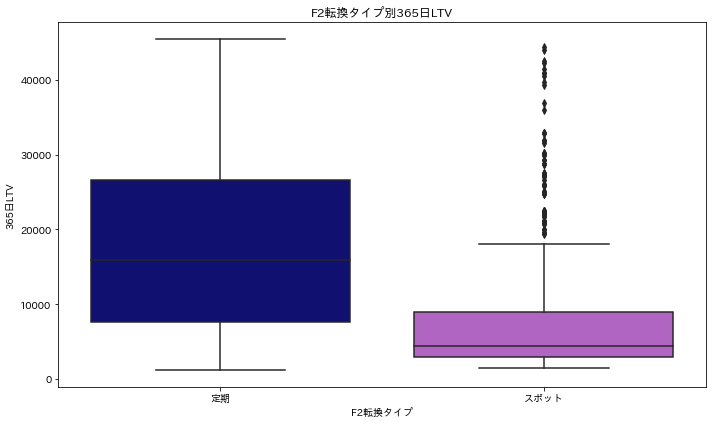

In [15]:
plt.figure(figsize=(10, 6))
colors = ['navy', 'mediumorchid']
sns.boxplot(x='second_purchase_type', y='ltv_365', data=df_filtered, palette=colors)
plt.title('F2転換タイプ別365日LTV')
plt.xlabel('F2転換タイプ')
plt.ylabel('365日LTV')
plt.tight_layout()  # レイアウトの自動調整
plt.show()

In [16]:
#F2の定期・スポットの分類ごとに、F2~F5の残存率を集計したCSVを読み込む
file_path = 'analysis1_sample_data_2.csv'
agg_df = pd.read_csv(file_path)

In [17]:
agg_df.head()

,second_purchase_type,count_second_users,count_third_users,count_fourth_users,count_fifth_users,second_survival_rate,third_survival_rate,fourth_survival_rate,fifth_survival_rate
0,スポット,3600,2247,1164,578,100.0,62.4,32.3,16.1
1,定期,14400,12055,10948,9943,100.0,83.7,76.0,69.0


In [18]:
# 購入フェーズ（X軸のラベル）
phases = ['F2', 'F3', 'F4', 'F5']

In [19]:
user_counts = agg_df.filter(like='count_').values.T  # ユーザーカウント
survival_rates = agg_df.filter(like='_survival_rate').values.T  # 残存率

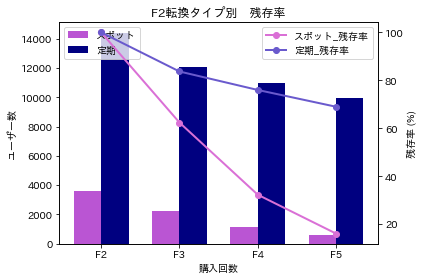

In [20]:
x = np.arange(len(phases))  # ラベルの位置
width = 0.35  # バーの幅
fig, ax1 = plt.subplots()

# ユーザーカウントの縦棒グラフ
ax1.bar(x - width/2, user_counts[:, 0], width, label='スポット', color='mediumorchid')
ax1.bar(x + width/2, user_counts[:, 1], width, label='定期', color='navy')
ax1.set_xlabel('購入回数')
ax1.set_ylabel('ユーザー数')
ax1.set_title('F2転換タイプ別　残存率')
ax1.set_xticks(x)
ax1.set_xticklabels(phases)
ax1.legend(loc='upper left')

# 残存率の折れ線グラフ
ax2 = ax1.twinx()  # 共通のX軸を持つY軸を追加
ax2.plot(phases, survival_rates[:, 0], label='スポット_残存率', color='orchid', marker='o', linewidth=2)
ax2.plot(phases, survival_rates[:, 1], label='定期_残存率', color='slateblue', marker='o', linewidth=2)
ax2.set_ylabel('残存率 (%)')  # Y軸のラベルを設定

fig.tight_layout() 
ax2.legend(loc='upper right')

In [21]:
# second_purchase_typeが定期である行をフィルタリング
filtered_df = df[df['second_purchase_type'] == '定期']

# フィルタリングしたDataFrameを使って集約処理
agg_mean_results = filtered_df.groupby('second_purchase_item_quantity').agg(
    avg_ltv=pd.NamedAgg(column='ltv_365', aggfunc='mean')
).reset_index()

In [22]:
agg_mean_results = agg_mean_results.rename(columns={
    'second_purchase_item_quantity': 'F2定期商品数',
    'avg_ltv': '365日LTV平均'
})

In [23]:
agg_mean_results['365日LTV平均'] = agg_mean_results['365日LTV平均'].round()
agg_mean_results['365日LTV平均'] = agg_mean_results['365日LTV平均'].astype('int')
agg_mean_results['F2定期商品数'] = agg_mean_results['F2定期商品数'].astype('int')

In [24]:
agg_mean_results

,F2定期商品数,365日LTV平均
0,1,7901
1,2,13460
2,3,21604


In [25]:
filtered_df = df[df['second_purchase_type'] == '定期']

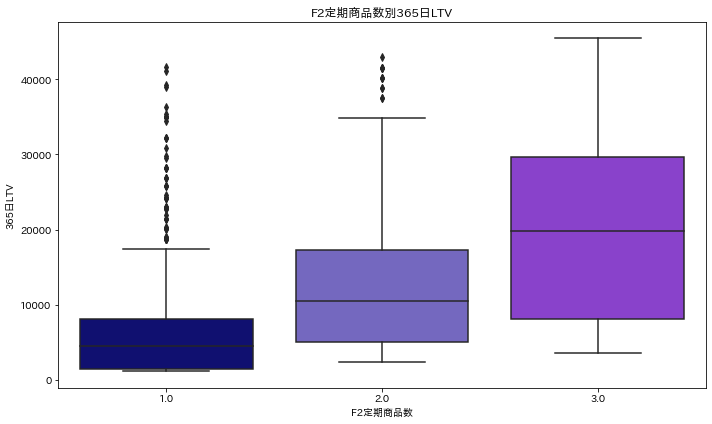

In [26]:
plt.figure(figsize=(10, 6))
colors = ['navy', 'slateblue', 'blueviolet']
sns.boxplot(x='second_purchase_item_quantity', y='ltv_365', data=df_filtered, palette=colors)
plt.title('F2定期商品数別365日LTV')
plt.xlabel('F2定期商品数')
plt.ylabel('365日LTV')
plt.tight_layout()  # レイアウトの自動調整
plt.show()

In [27]:
#F3~F5までの定期品数の増減を集計したCSVを読み込む
file_path = 'analysis1_sample_data_3.csv'
item_quantity_df = pd.read_csv(file_path)

In [28]:
item_quantity_df.head()

,user_id,second_purchase_item_quantity,third_purchase_item_quantity,fourth_purchase_item_quantity,fifth_purchase_item_quantity,status_f3,status_f4,status_f5
0,2,3,NaN,NaN,NaN,NaN,NaN,NaN
1,4,3,3.0,2.0,2.0,維持,減少,維持
2,11,3,3.0,3.0,3.0,維持,維持,維持
3,15,3,NaN,NaN,NaN,NaN,NaN,NaN
4,16,3,3.0,NaN,NaN,維持,NaN,NaN


In [29]:
status = ['status_f3', 'status_f4', 'status_f5']
results = {status: item_quantity_df.groupby(status)["user_id"].nunique() for status in status}

In [30]:
results_df = pd.DataFrame(results).fillna(0).transpose()

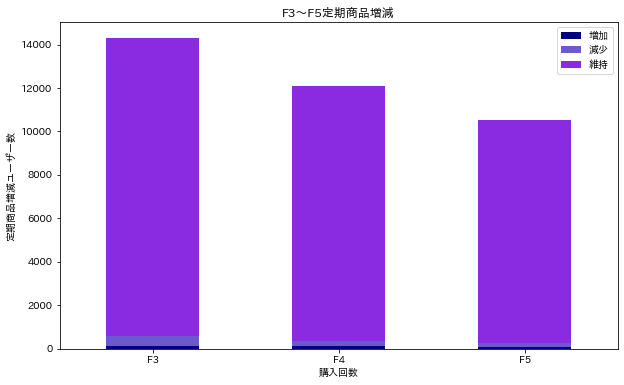

In [31]:
colors = ['navy', 'slateblue', 'blueviolet']
results_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
ticks = range(len(results_df.index))
labels = ['F3', 'F4', 'F5']
plt.title('F3〜F5定期商品増減')
plt.xlabel('購入回数')
plt.ylabel('定期商品増減ユーザー数')
plt.xticks(ticks=ticks, labels=labels, rotation=0)

plt.show()